In [1]:
import pandas as pd
board_games = pd.read_csv('board_games.csv')
board_games.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [4]:
board_games = board_games.dropna()
board_games = board_games[board_games['users_rated']>0]
board_games.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


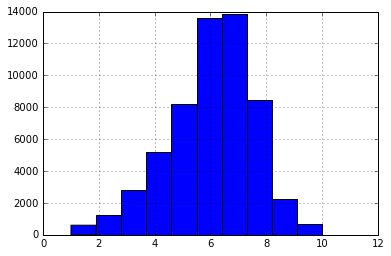

In [5]:
%matplotlib inline
board_games['average_rating'].hist()

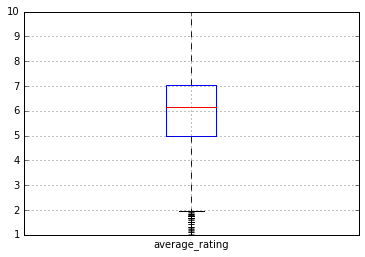

In [8]:
board_games.boxplot('average_rating', return_type='axes')

In [9]:
print('Average Rating STD: ', board_games['average_rating'].std())
print('Average Rating Mean: ', board_games['average_rating'].mean())

Average Rating STD:  1.57882993483
Average Rating Mean:  6.01611284933


**Model Error Metric**

The distribution of average ratings is farily normal with a slight negative skew, and the majority of values occur between 3 to 9 on a 1-10 point scale. With this continuous data, mean squared error (MSE) is a good error metric to begin with in our model. We can compare MSE to STD to gauge how well our initial model is performing.

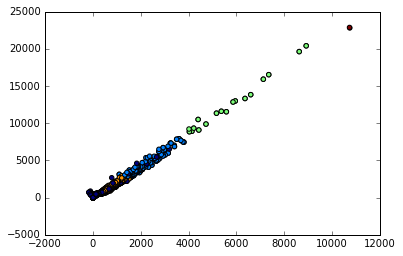

In [12]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

kclust = KMeans(5)
numeric_columns = board_games.iloc[:,3:]
kclust.fit(numeric_columns)
labels = kclust.labels_
game_mean = numeric_columns.apply(np.mean, axis=1)
game_std = numeric_columns.apply(np.std, axis=1)
plt.scatter(game_mean, game_std, c=labels)
plt.show()

Most of the games are quite similar, though a small group of games with higher average feature values stand out from the rest. Fewer features and/or clusters may be adequate.

In [14]:
correlations = numeric_columns.corr()
print(correlations['average_rating'])

yearpublished           0.108461
minplayers             -0.032701
maxplayers             -0.008335
playingtime             0.048994
minplaytime             0.043985
maxplaytime             0.048994
minage                  0.210049
users_rated             0.112564
average_rating          1.000000
bayes_average_rating    0.231563
total_owners            0.137478
total_traders           0.119452
total_wanters           0.196566
total_wishers           0.171375
total_comments          0.123714
total_weights           0.109691
average_weight          0.351081
Name: average_rating, dtype: float64


Perhaps surprisingly, the year published has a fairly strong positive correlation with average_rating, as newer games are higher rated. Games for older players (minage) are also rated more highly. The higher the site's (BoardGameGeek) judged "weightiness" of a game (average_weight) the higher rating the game tends to receive.

**Train and Test on full dataset**

In [19]:
reg = LinearRegression()
reg.fit(board_games[cols], board_games["average_rating"])
predictions = reg.predict(board_games[cols])

np.mean((predictions - board_games["average_rating"]) ** 2)

2.0933969758339361

**Use a holdout test set, with 80/20% split**

In [15]:
split_idx = board_games.shape[0]*.8
print(split_idx)

45515.200000000004


In [17]:
from sklearn.linear_model import LinearRegression
cols = list(board_games.columns)
cols.remove('name')
cols.remove('id')
cols.remove('type')
cols.remove('average_rating')
cols.remove('bayes_average_rating')
train = board_games.iloc[0:45515, :]
test = board_games.iloc[45516:, :]

model = LinearRegression()
model.fit(train[cols], train['average_rating'])
predictions = model.predict(test[cols])
mse = np.mean((predictions - test['average_rating']) ** 2)
print('Mean Squared Error: ', mse)

Mean Squared Error:  3.83026208494


This simple regression model doesn't have great predictive power, given the MSE for the holdout test set is more than twice the standard deviation of the data. More exploration of the included features or usage of a more sophisticated model in the future is warranted.